# Explainable AI Assignment

# Task 1

## Import Libraries

In [1]:
#required libraries
import numpy as np
import pandas as pd
from statistics import mean 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Load the data
Display the first 5 rows of the data after loading.

In [2]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


No null values

In [5]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,212.0,54.561321,9.493376,29.0,47.00,57.00,61.25,77.0
sex,212.0,0.688679,0.464130,0.0,0.00,1.00,1.00,1.0
cp,212.0,0.915094,1.008193,0.0,0.00,1.00,2.00,3.0
trestbps,212.0,132.127358,17.440700,94.0,120.00,130.00,140.00,192.0
chol,212.0,247.830189,53.199877,126.0,211.75,240.50,277.00,564.0
fbs,212.0,0.165094,0.372144,0.0,0.00,0.00,0.00,1.0
restecg,212.0,0.537736,0.527437,0.0,0.00,1.00,1.00,2.0
thalach,212.0,148.995283,23.332645,71.0,132.00,151.50,165.25,202.0
exang,212.0,0.330189,0.471394,0.0,0.00,0.00,1.00,1.0
oldpeak,212.0,1.008491,1.141681,0.0,0.00,0.65,1.60,5.6


<AxesSubplot:>

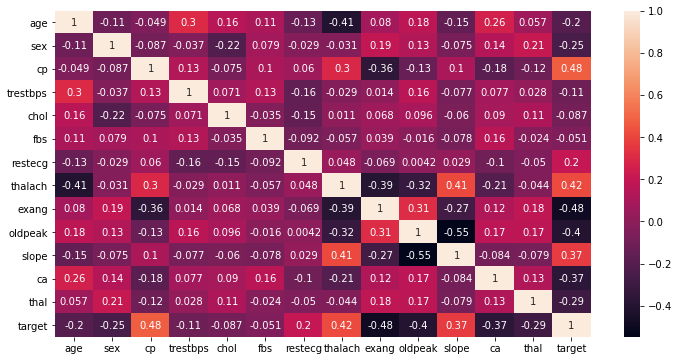

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(heart_data.corr(), annot=True)

It is seen from the heatmap above that cp, thalach, exang, and oldpeak features are the most correlated features with the target.

<AxesSubplot:>

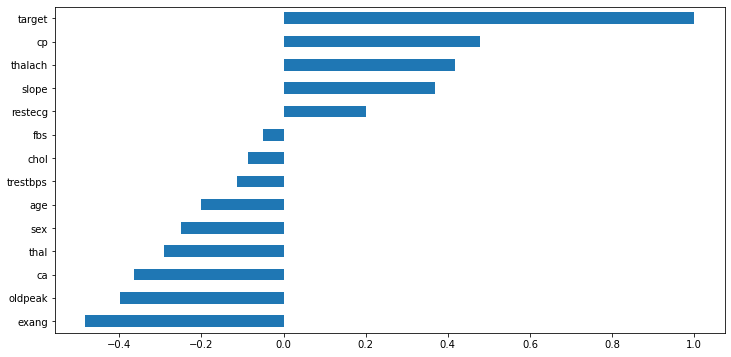

In [7]:
#Finding the correlation target with other features
plt.figure(figsize=(12,6))
heart_data.corr().target.sort_values().plot.barh()

## Separate the Input and Target Features of the data

In [8]:
X=heart_data.drop("target", axis=1)
y=heart_data.target

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((169, 13), (43, 13))

In [10]:
#In order to keep the original df
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(X, y, test_size=0.2, random_state=0)

## Scale your data if required

In [11]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Task 2

## Build a Logistic Regression Model on train set

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Evaluate the model using F1 Score

In [13]:
print(f1_score(y_test, y_pred))

0.8399999999999999


# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [14]:
import shap

In [15]:
explainer=shap.LinearExplainer(logreg, X_train)  # creating an explainer for our model
shap_values=explainer.shap_values(X_test) # finding out the shap values using the explainer

In [16]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 0.2977444318944053


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.086223,-0.279619,1.159063,-0.240417,-0.034219,-0.055162,-0.673186,0.473878,0.570792,0.372988,0.318451,0.317311,0.357128
1,-0.023755,0.622378,1.159063,0.037522,-0.030002,0.005456,-0.673186,-1.113122,0.570792,0.372988,0.318451,0.317311,3.002523
2,0.020236,0.622378,0.159871,-0.055124,0.076274,0.005456,0.412598,0.505618,0.570792,-0.254762,0.318451,0.317311,0.357128
3,-0.287704,-0.279619,0.159871,0.454429,-0.013976,0.005456,0.412598,0.092998,0.570792,0.372988,0.318451,0.317311,0.357128
4,0.218197,-0.279619,2.158256,-0.935263,-0.020724,0.005456,-0.673186,0.156478,0.570792,0.059113,-0.359105,0.317311,-0.965569


## Write your inferences from the generated table


The resulting dataframe shows us the difference between the model output for that sample and the expected value of the model output for each row.

From this difference we can explain why the model is inclined on predicting a specific class outcome.

In the model the **Expected Value is 0.2977444318944053**. The values above this expected value will be put into class 1 (heart disease is present) wheras the values below it will be put into class 0 (no heart disease).

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [17]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_disp.iloc[0, :])

## Write your inferences from the generated plot.

As seen from the force plot above, **"restecg"**, **"sex"** and **"trestbps"** features are pushing the model’s output for X_test’s 1st row below the base value (0.2977) to the class 0 (no heart disease) region. However rest of the other features are pushing the model's output for X_test's 1st row above the base value to the class 1 (heart disease is present) region.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:212,:], X_test_disp.iloc[:212,:])

## Write your inferences from the generated plot.

In the middle part of the plot (sample order by similarity), it is seen that almost all of the features are pushing the model's output below the base value. On the other hand, at the beginning (partially) and in the end of the plot, the number of features that push the model's output above the base value is higher than that of the features that do the opposite.

# Task 6

## Plot a SHAP summary plot using all the features in the data

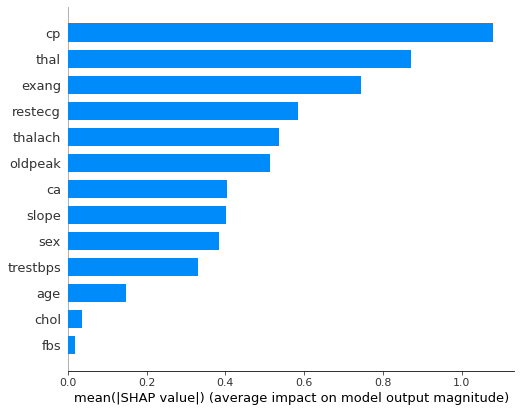

In [19]:
shap.summary_plot(shap_values, X_test_disp, plot_type='bar')

## Write your inferences from the generated plot.


From the above bar chart, we observe that **"cp"**, **"thal"** and **"exang"** are the top 3 important features in determining the heart disease status.

On the other hand, **"chol"** and **"fbs"** are the least important features in determining the heart disease status.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

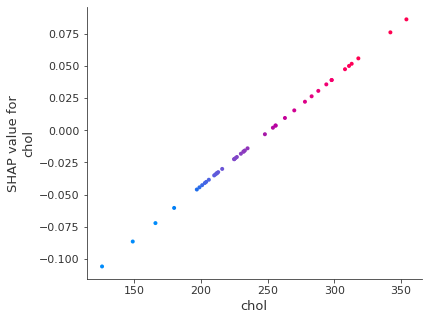

In [20]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test_disp)

## Write your inferences from the generated plot.

Since our model is Logistic Regresssion, the dependence plot for "**chol"** is linear (a straight line). It is clearly seen from the dependence plot that, as the **"chol"** increases the probability of heart disease increases as well.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

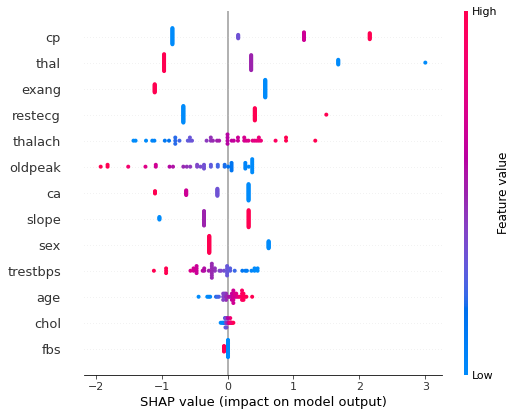

In [21]:
shap.initjs()
shap.summary_plot(shap_values, X_test_disp)

Here we see again that "cp", "thal" and "exang" are the top 3 important features. But, for those samples where "thalach"  and "oldpeak" matters, they are also important features. Because their SHAP values are high.
Since their SHAP values are very low, "chol" and "fbs" are the least important features in the model.